# AI Powered Recipe Recommendation System 

#### Data Analysis Mathematics, Algorithms and Modeling
##### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |

### Introduction

In the world, where people are more health conscious and work driven, often face difficulty to prepare meals considering time, ingredients availability and dietary preferences. Although there are a millions of recipes available on internet, it requires efforts to find the one with fits with available resources. 

The objective of this project to utilize advanced technologies backed up with large dataset helps to generate customized meal suggestions based on user input.
#### Problem Statement:

The project's goal is to create a recipe recommendation system powered by AI that makes meal planning easier. A dataset containing 231638 recipes is filtered by ingredients, dietary restrictions, and time constraints to provide users with personalised food recommendations. Based on user choices, this system offers quick, customised meal selections.

### Dataset & Programming Requirements

##### Ractangular Dataset : files
1. Raw_recepes.csv
2. Raw_interaction.csv

##### Import Libraries

In [77]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as zscore
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


##### RawRecipe : Dataset in classes and methods

In [49]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data

##### RAW_interactions : Dataset in classes and methods

In [50]:
class RecepeInteraction:
    def __init__(self):
        self.file_path = './Dataset/RAW_interactions.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_interactions.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    def view_sample_data(self):
        self.data.head(5)

    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")
     # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for recepe \r\n")
        if self.data is not None:
            counts = self.data["recipe_id"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["recipe_id", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

#### The main function : Initialise class objects & load data

In [51]:
if __name__ == "__main__":

    # Create an instance of the RecepeInteraction  class and load data
    interactionData = RecepeInteraction()
    interactionData.load_data()

    # Create an instance of the RecepeInteraction  class and load data
    recepeData = RawRecipe()
    recepeData.load_data()

---> STEP 1 : Loads the data from a CSV file. 

RAW_interactions.csv : Data loaded successfully.
Total Records : 1132367 

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 



#### Merge dataset based on recipe Id

In [52]:
# Merge data using common field recepe Id
merged_data = pd.merge(recepeData.data, interactionData.data, left_on='id', right_on='recipe_id')
print("Data Merged Successfully")
merged_data.head(2)

Data Merged Successfully


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...


### Data Preprocessing

##### 1. Columns for nutrition Values

- Nutrition columns are stored as array of numbers [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0] those are ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates'] accordingly
- Those are separated in columns

In [53]:
nutrition_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
merged_data[nutrition_columns] = merged_data['nutrition'].str.strip('[]').str.split(',', expand=True)
merged_data[nutrition_columns] = merged_data[nutrition_columns].apply(pd.to_numeric, errors='coerce')

##### 2. Binary labeling for recipe popularity

In [54]:
merged_data['popular'] = (merged_data['rating'] >= 4).astype(int)

In [55]:
merged_data.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,rating,review,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,popular
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,5,I used an acorn squash and recipe#137681 Swee...,51.5,0.0,13.0,0.0,2.0,0.0,4.0,1
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,5,This was a nice change. I used butternut squas...,51.5,0.0,13.0,0.0,2.0,0.0,4.0,1


### Hypothesis

***Null Hypothesis (H₀)*** <br>
There is no significant difference in the mean calorie content based on the levels of total fat, sugar, protein, or saturated fat.

***Alternative Hypothesis (H₁)***<br>
There is a significant difference in the mean calorie content based on the levels of total fat, sugar, protein, or saturated fat.

##### Apply Normalization for columns considered in null hypothesis : z-score normalization

In [65]:
# Select numerical columns for normalization
numerical_cols = ["calories","total_fat","sugar","sodium","protein","saturated_fat","carbohydrates"]

# Z-score normalization
for col in numerical_cols:
    merged_data[f"{col}_norm"] = (merged_data[col] - merged_data[col].mean()) / merged_data[col].std()

merged_data.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,saturated_fat,carbohydrates,popular,calories_norm,total_fat_norm,sugar_norm,sodium_norm,protein_norm,saturated_fat_norm,carbohydrates_norm
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,4.0,1,-0.396817,-0.472918,-0.103266,-0.265144,-0.453201,-0.465453,-0.166323
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,4.0,1,-0.396817,-0.472918,-0.103266,-0.265144,-0.453201,-0.465453,-0.166323


#### Review Distribution

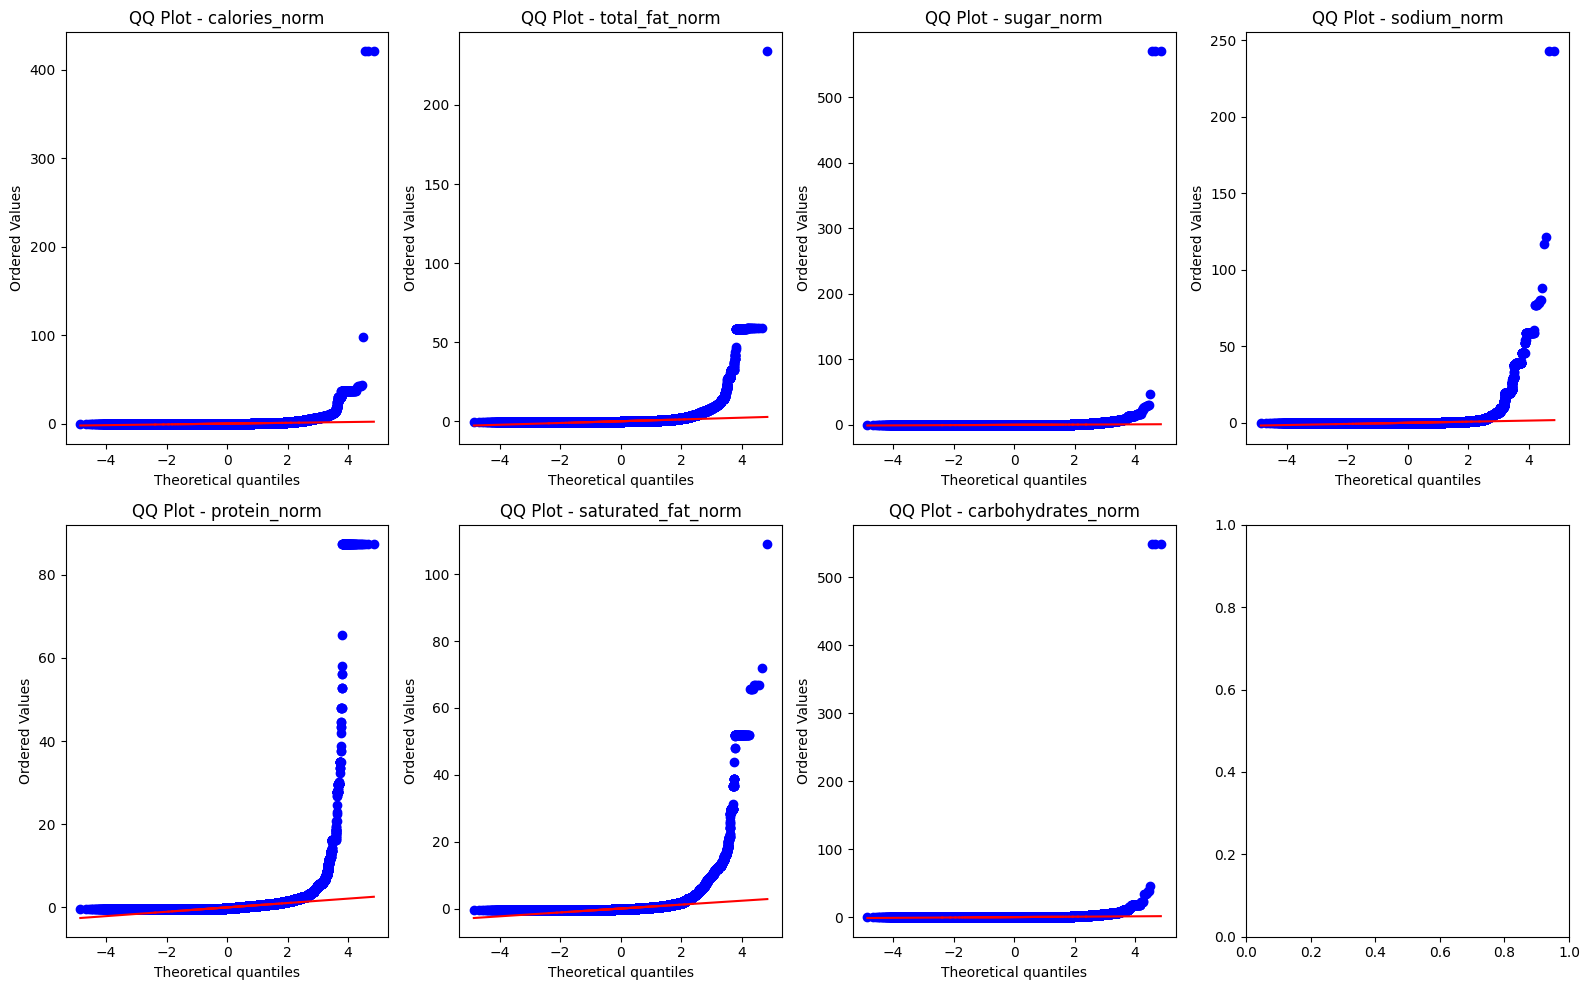

In [76]:
# Create a 4x2 grid of subplots (4 rows and 2 columns)

numerical_cols_norm = ["calories_norm","total_fat_norm","sugar_norm","sodium_norm","protein_norm","saturated_fat_norm","carbohydrates_norm"]

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

# Plot QQ plot for each column
for i, col in enumerate(numerical_cols_norm):
    
    # Get the data for the column
    data = merged_data[col].dropna()  # Drop NaN values if any

    # Create QQ plot
    stats.probplot(data, dist="norm", plot=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f"QQ Plot - {col}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


- The QQ plots displayed for various nutritional columns (calories, total fat, sugar, sodium, protein, saturated fat, and carbohydrates) suggest that the distributions of these variables are highly skewed. 
- In each plot, the data points deviate significantly from the red line (the normal distribution) at both the lower and upper ends, indicating that the distributions are not normal. 
- For most of the variables, there are substantial deviations in the tails of the plots, with many points clustered in the lower range and a few outliers at higher values. This suggests the presence of heavy tails or possible outliers.


#### Corelation

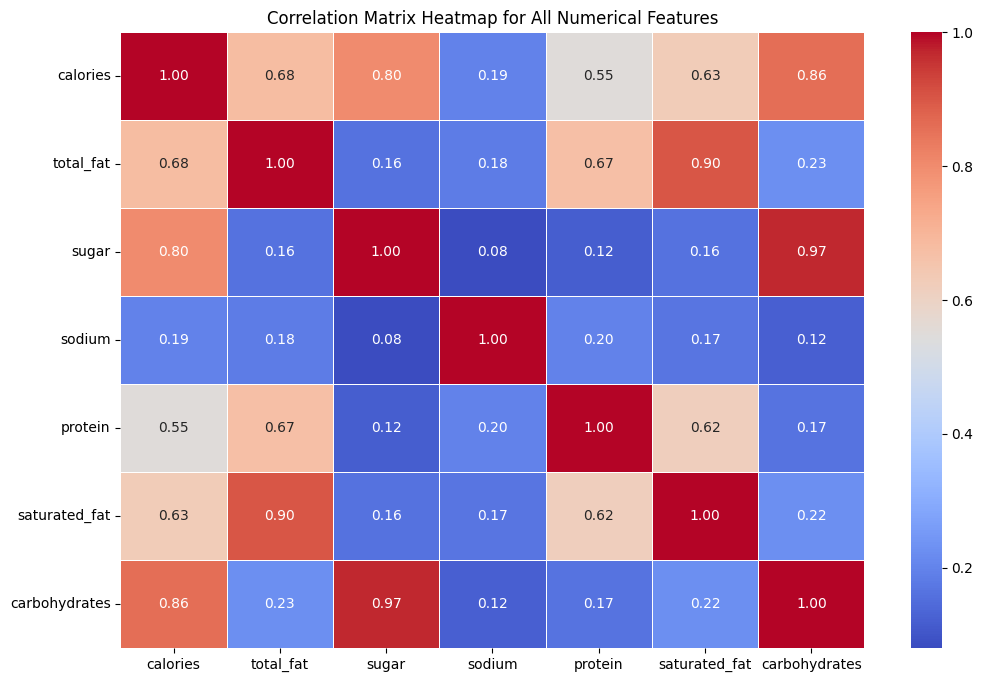

In [69]:
# Extract all numerical columns from the dataset
# numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for all numerical columns
correlation_matrix = merged_data[numerical_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for All Numerical Features")
plt.show()

#### ANOVA

As our data is continuous ( not categorical), We will be applying ANOVA test in order to identify relation between calories and other nutritional columns.

In [ ]:
# List of variables to test
variables = ['total_fat_norm', 'sugar_norm', 'sodium_norm', 'protein_norm', 'saturated_fat_norm']

# Create bins for each variable and perform ANOVA
for var in variables:
    # Create bins for the variable
    merged_data[f'{var}_bins'] = pd.qcut(merged_data[var], q=3, labels=['Low', 'Medium', 'High'])

    # Group calorie data by bins
    low = merged_data[merged_data[f'{var}_bins'] == 'Low']['calories_norm']
    medium = merged_data[merged_data[f'{var}_bins'] == 'Medium']['calories_norm']
    high = merged_data[merged_data[f'{var}_bins'] == 'High']['calories_norm']

    # Perform ANOVA
    anova_result = f_oneway(low, medium, high)
    
    # Print results
    print(f"ANOVA Result for {var}:")
    print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}\n")


ANOVA Result for total_fat_norm:
F-statistic: 54421.76089842816, p-value: 0.0

ANOVA Result for sugar_norm:
F-statistic: 12556.693286927115, p-value: 0.0

ANOVA Result for sodium_norm:
F-statistic: 30610.07739933088, p-value: 0.0

ANOVA Result for protein_norm:
F-statistic: 36017.375547281335, p-value: 0.0

ANOVA Result for saturated_fat_norm:
F-statistic: 44927.13900311199, p-value: 0.0



For all variables (total fat, sugar, sodium, protein, and saturated fat), **the p-values are 0.0**, which are well below the significance threshold (0.05). 
<br>
<br>
This indicates that there are significant differences in the mean calorie content across the levels of these variables. 
<br>
<br>
Thus, we **reject the null hypothesis (H₀) for all cases** and conclude that **these variables are strong predictors of calorie content.**

### Dimensionality Reduction : using PCA

PCA reduces the dimensionality of your dataset by transforming correlated variables into a smaller number of uncorrelated principal components. Each component explains a portion of the dataset's variance.

Why? PCA works best when the data is scaled, as it relies on variance. Here we have already applied z-score normalization on our numerical columns for null and revised hypothesis. we can apply PCA.

In [ ]:
features = ['total_fat_norm', 'sugar_norm', 'sodium_norm', 'protein_norm', 'saturated_fat_norm', 'carbohydrates_norm']
X = merged_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Print explained variance
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: Explained Variance = {var:.4f}, Cumulative Variance = {cum_var:.4f}")



PC1: Explained Variance = 0.4641, Cumulative Variance = 0.4641
PC2: Explained Variance = 0.2872, Cumulative Variance = 0.7513
PC3: Explained Variance = 0.1560, Cumulative Variance = 0.9073
PC4: Explained Variance = 0.0727, Cumulative Variance = 0.9800
PC5: Explained Variance = 0.0157, Cumulative Variance = 0.9957
PC6: Explained Variance = 0.0043, Cumulative Variance = 1.0000


PC1 explains 46.41% of the variance, making it the most significant principal component.<br>
PC2 explains 28.72% of the variance, bringing the cumulative variance explained to 75.13%.<br>
PC3 explains 15.60% of the variance, making the cumulative variance reach 90.73%.<br>
PC4 explains 7.27% of the variance, increasing the cumulative variance to 98.00%.<br>
PC5 and PC6 explain only minor amounts of variance (1.57% and 0.43%, respectively), contributing minimally to the overall dataset variance.

In [79]:
pca = PCA(n_components=2)  # Choose the number of components
X_reduced = pca.fit_transform(X_scaled)

In [80]:
loadings = pd.DataFrame(pca.components_, columns=features, index=[f"PC{i+1}" for i in range(pca.n_components_)])
print(loadings)

     total_fat_norm  sugar_norm  sodium_norm  protein_norm  \
PC1        0.519100    0.326614     0.189101      0.445729   
PC2       -0.288428    0.631599    -0.042185     -0.277381   

     saturated_fat_norm  carbohydrates_norm  
PC1            0.508648            0.361528  
PC2           -0.279527            0.600864  


***Principal Component 1***<br>
- Total Fat has a positive loading (0.5191), meaning it contributes significantly to this component. As the total fat increases, PC1 also increases.
- Saturated Fat has a positive loading (0.5086), which indicates it also contributes to PC1.
- Sugar has a positive loading (0.3266), so it also contributes to PC1, though to a lesser extent than total fat.
- Carbohydrates has a positive loading (0.3615), suggesting a moderate contribution to PC1.

***Principal Component 2***<br>
- Sugar has a high positive loading (0.6316), meaning it contributes most strongly to PC2.
- Carbohydrates has a high positive loading (0.6009), indicating that as carbohydrates increase, PC2 also increases.
- Total Fat has a negative loading (-0.2884), indicating an inverse relationship with PC2. As total fat increases, PC2 decreases.
- Protein has a negative loading (-0.2774), indicating that as protein increases, PC2 decreases.
- Saturated Fat has a negative loading (-0.2795), meaning as saturated fat increases, PC2 decreases.

**PC1 seems to capture a "fat and protein" dimension, whereas PC2 captures a "sugar and carbohydrates" dimension.**